The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
                   dir  image_size repo_id transform distance_metric  \
20  data/raw/5-real-ds        1024     max     clean     lpips_vgg_2   
21  data/raw/5-real-ds        1024     max     clean     lpips_vgg_2   
22  data/raw/5-real-ds        1024     max     clean     lpips_vgg_2   
23  data/raw/5-real-ds        1024     max     clean     lpips_vgg_2   
24  data/raw/5-real-ds        1024     max     clean     lpips_vgg_2   

              file complexity_metric  \
20  r000da54ft.png        meaningful   
21  r001d260dt.png        meaningful   
22  r002fc3e2t.png        meaningful   
23  r00444b95t.png        meaningful   
24  r005f3e70t.png        meaningful   

                                             distance  \
20  [0.01174, 0.012375, 0.01487, 0.01613, 0.01643,...   
21  [0.01714, 0.0208, 0.0259, 0.02461, 0.02425, 0....   
22  [0.0346, 0.03522, 0.03583, 0.0352, 0.03534, 0....   
23  [0.024

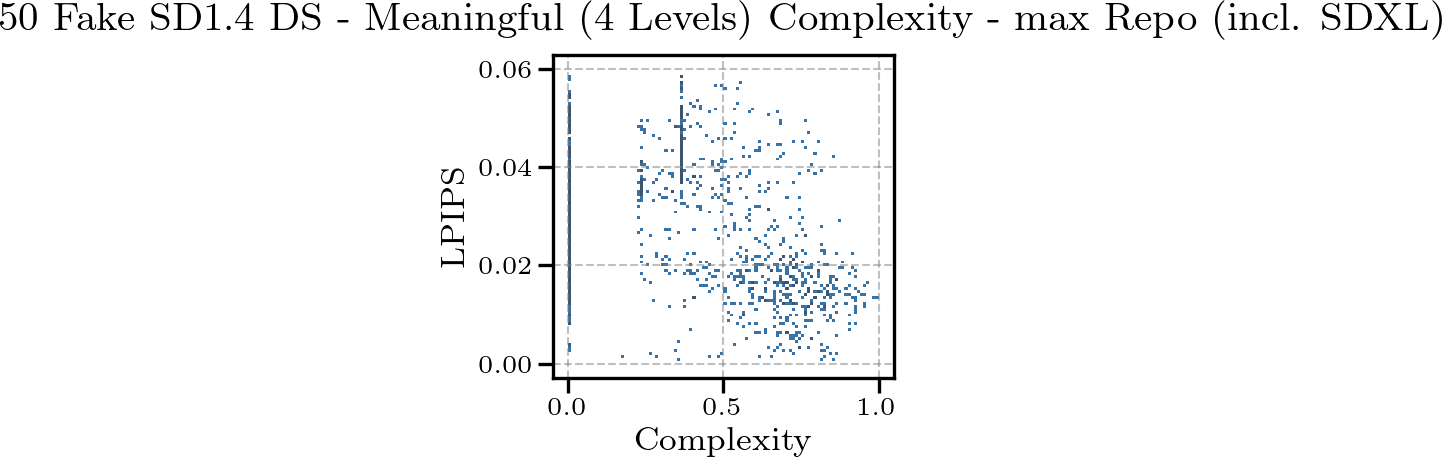

In [31]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from aeroblade.paper import configure_mpl, set_figsize

# Configure matplotlib
configure_mpl()
set_figsize("single", ratio=1.0, factor=0.49)

plot_title = "50 Fake SD1.4 DS - Meaningful (4 Levels) Complexity - max Repo (incl. SDXL)"
experiment_id = "5-real-meaningful-test"
repo_id = "max"
complexity_metric = "meaningful"

# Define output directory
output_dir = Path(f"../output/02/{experiment_id}/figures")
output_dir.mkdir(exist_ok=True, parents=True)

# Load and preprocess the data
combined = pd.read_parquet(f"../output/02/{experiment_id}/combined_dist_compl.parquet").query(
    f"repo_id == '{repo_id}' and complexity_metric == '{complexity_metric}'"
)

def normalize_column(df, column):
    """Normalize a column to the 0-1 range dynamically."""
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)
    return df

# Define reusable functions
def plot_histogram(data, x, y, title, xlabel, ylabel, binrange, vmax):
    """Plots and saves a histogram."""
    sns.histplot(
        x=data[x],
        y=data[y],
        stat="density",
        bins=100,
        legend=False,
        binrange=binrange,
        vmax=vmax,
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.show()
    plt.close()

# Process and plot group histograms and mean curves
xlim = (0, 1)
ylim = (0, 0.06)

for _, group_df in combined.groupby("dir", observed=True):
    print(group_df)
    print(group_df["file"][23])
    print(group_df["complexity"][23])

    #for i in range(0, len(group_df["complexity"][23]), 15):
    #    print(group_df["complexity"][23][i:i+15])
    
    complexity_values = np.stack(group_df.complexity).flatten()
    distance_values = np.stack(group_df.distance).flatten()

    # mean over patch distances for each image
    #distance_values = np.stack((group_df.distance).apply(np.mean)).flatten()

    #print(distance_values)
    
    group_data = pd.DataFrame({"complexity": complexity_values, "distance": distance_values})

    # Normalize the complexity values for each group
    group_data = normalize_column(group_data, "complexity")
    
    # Plot histogram
    plot_histogram(
        group_data, "complexity", "distance",
        plot_title,
        "Complexity", "LPIPS",
        binrange=(xlim, ylim), vmax=200
    )